 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [60]:
# Initial imports
import seaborn as sns
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

print(f"Current Working Directory: {Path.cwd()}")

Current Working Directory: /Users/dadslaptop/Desktop/HW3/Instructions/Starter_Code


In [2]:
whale_returns = Path("Resources/whale_returns.csv")
algo_returns = Path("Resources/algo_returns.csv")
sp500_returns = Path("Resources/sp500_history.csv")

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_returns = pd.read_csv(whale_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)
whale_returns = whale_returns.sort_index()
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
# Drop nulls
whale_returns = whale_returns.dropna()

In [6]:
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [7]:
# Reading algorithmic returns
algo_returns = pd.read_csv(algo_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)
algo_returns = algo_returns.sort_index()
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [8]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [9]:
# Drop nulls
algo_returns = algo_returns.dropna()

In [10]:
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [11]:
# Reading S&P 500 Closing Prices
sp500_returns = pd.read_csv(sp500_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)
sp500_returns = sp500_returns.sort_index()
sp500_returns.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [12]:
# Check Data Types
sp500_returns.dtypes

Close    object
dtype: object

In [13]:
sp500_returns['Close'] = sp500_returns['Close'].str.replace("$", "")
sp500_returns.head()

/var/folders/r0/9j8j_dkd1rn_0yyg9s0c89dc0000gn/T/ipykernel_2430/568430174.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  sp500_returns['Close'] = sp500_returns['Close'].str.replace("$", "")


,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [14]:
# Fix Data Types
sp500_returns["Close"] = sp500_returns["Close"].astype("float")
sp500_returns.head()

,Close
Date,
2012-10-01,1444.49
2012-10-02,1445.75
2012-10-03,1450.99
2012-10-04,1461.40
2012-10-05,1460.93


In [15]:
sp500_returns.dtypes

Close    float64
dtype: object

In [16]:
# Calculate Daily Returns
daily_returns = sp500_returns.pct_change()
daily_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [17]:
# Drop nulls
daily_returns = daily_returns.dropna()

In [18]:
# Rename `Close` Column to be specific to this portfolio
daily_returns.columns = ['Daily returns']
daily_returns.dropna()

,Daily returns
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457
...,...
2019-04-16,0.000509
2019-04-17,-0.002274
2019-04-18,0.001579


## Combine Whale, Algorithmic, and S&P 500 Returns

In [19]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([algo_returns, whale_returns, daily_returns], axis="columns", join = 'inner')
combined_df.head()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Daily returns
Date,,,,,,,
2015-03-03,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539
2015-03-04,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.004389
2015-03-05,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001196
2015-03-06,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174
2015-03-09,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.003944


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

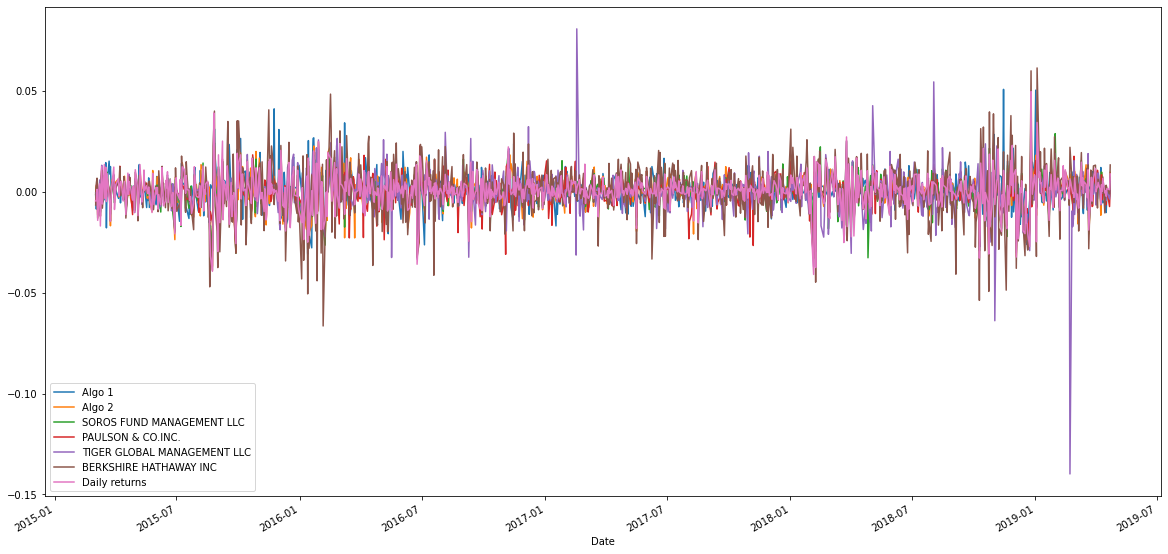

In [20]:
# Plot daily returns of all portfolios
combined_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

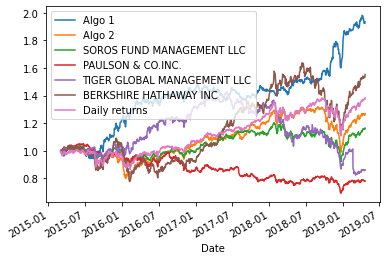

In [21]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()
# Plot cumulative returns
cumulative_returns.plot()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

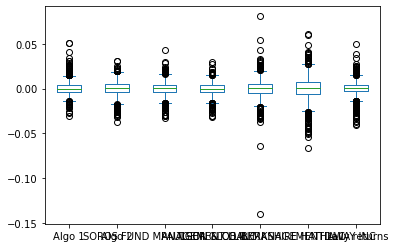

In [22]:
# Box plot to visually show risk
combined_df.plot.box()

### Calculate Standard Deviations

In [23]:
# Calculate the daily standard deviations of all portfolios
combined_df.std()

Algo 1                         0.007620
Algo 2                         0.008342
SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Daily returns                  0.008554
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [24]:
# Calculate  the daily standard deviation of S&P 500
daily_risk = combined_df['Daily returns'].std()
# Determine which portfolios are riskier than the S&P 500
combined_df.std() > daily_risk

Algo 1                         False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Daily returns                  False
dtype: bool

### Calculate the Annualized Standard Deviation

In [25]:
# Calculate the annualized standard deviation (252 trading days)
annualized_dev = combined_df.std() * np.sqrt(252)
annualized_dev.head()

Algo 1                         0.120967
Algo 2                         0.132430
SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

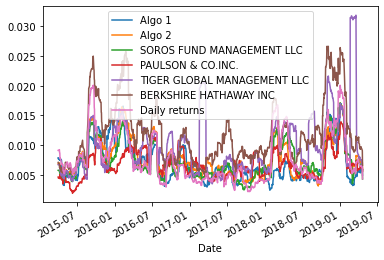

In [26]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_MA_21 = combined_df.rolling(window=21).std()
# Plot the rolling standard deviation
rolling_MA_21.plot()

### Calculate and plot the correlation

In [ ]:
# Calculate the correlation
correlation = combined_df.corr()
# Display de correlation matrix
correlation.style.background_gradient(cmap='summer')
#correlation.plot()

,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Daily returns
Algo 1,1.000000,0.288243,0.321211,0.268840,0.164387,0.292033,0.279494
Algo 2,0.288243,1.000000,0.826873,0.678152,0.507414,0.688082,0.858764
SOROS FUND MANAGEMENT LLC,0.321211,0.826873,1.000000,0.699914,0.561243,0.754360,0.837864
PAULSON & CO.INC.,0.268840,0.678152,0.699914,1.000000,0.434479,0.545623,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.164387,0.507414,0.561243,0.434479,1.000000,0.424423,0.623946
BERKSHIRE HATHAWAY INC,0.292033,0.688082,0.754360,0.545623,0.424423,1.000000,0.751371
Daily returns,0.279494,0.858764,0.837864,0.669732,0.623946,0.751371,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

<AxesSubplot:xlabel='Date'>

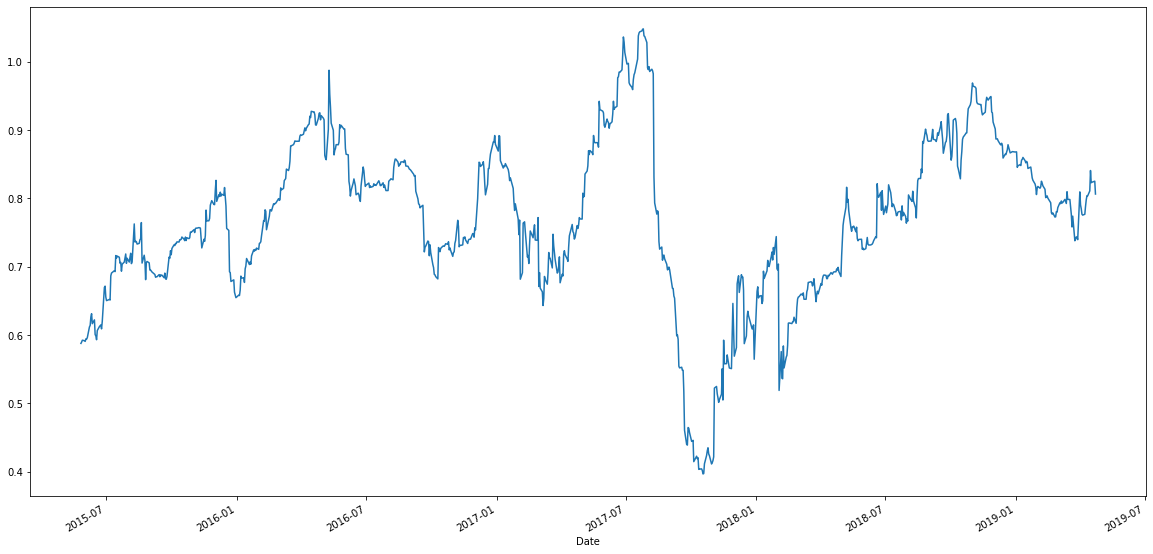

In [33]:
# Calculate covariance of a single portfolio cov compares 2 dframes 
covariance = combined_df['SOROS FUND MANAGEMENT LLC'].rolling(window=60).cov(combined_df['Daily returns'])
covariance
# Calculate variance of S&P 500 comapares how much they vary from eachother
variance = combined_df['Daily returns'].rolling(window=60).var()
variance
# Computing beta
beta = covariance / variance
# Plot beta trend
beta.plot(figsize=(20,10))

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

<AxesSubplot:xlabel='Date'>

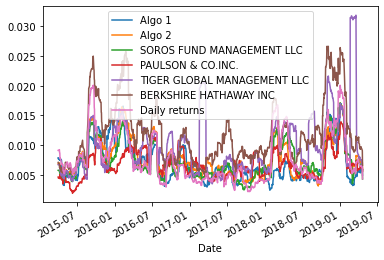

In [34]:
# Use `ewm` to calculate the rolling window ema use .STD 
combined_df.rolling(window=21).std().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [38]:
# Annualized Sharpe Rat
sharpe_ratio = (combined_df.mean() * 252 / combined_df.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratio'}>

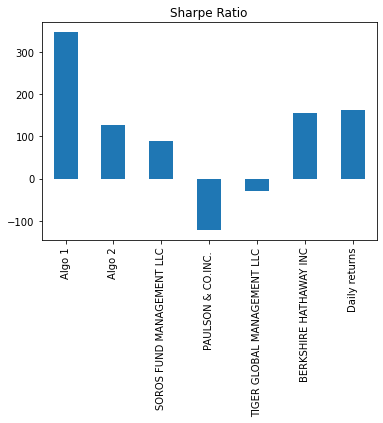

In [39]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot.bar(title="Sharpe Ratio")

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

---

In [40]:
combined_df.mean() < sharpe_ratio

Algo 1                          True
Algo 2                          True
SOROS FUND MANAGEMENT LLC       True
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC    False
BERKSHIRE HATHAWAY INC          True
Daily returns                   True
dtype: bool

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [41]:
# Reading data from 1st stock
tell_returns = Path('../Starter_Code/Resources/Tell_stock.csv')
tell_returns = pd.read_csv(tell_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)
tell_returns = tell_returns.sort_index()
tell_returns.head()

,Close
Date,
2020-03-16,0.84
2020-03-17,0.88
2020-03-18,0.69
2020-03-19,0.79
2020-03-20,1.00


In [42]:
# Reading data from 2nd stock
apple_returns = Path('../Starter_Code/Resources/apple_stock.csv')
apple_returns = pd.read_csv(apple_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)
apple_returns = apple_returns.sort_index()
apple_returns.head()

,Close
Date,
2020-03-16,60.55
2020-03-17,63.22
2020-03-18,61.67
2020-03-19,61.20
2020-03-20,57.31


In [43]:
# Reading data from 3rd stock
amazon_returns = Path('../Starter_Code/Resources/amazon_stock.csv')
amazon_returns = pd.read_csv(amazon_returns, index_col='Date', parse_dates=True, infer_datetime_format=True)
amazon_returns = amazon_returns.sort_index()
amazon_returns.head()

,Close
Date,
2020-03-16,1689.15
2020-03-17,1807.84
2020-03-18,1830.00
2020-03-19,1880.93
2020-03-20,1846.09


In [44]:
# Combine all stocks in a single DataFrame
my_stock_df = pd.concat([tell_returns, apple_returns, amazon_returns], axis='columns', join='inner' )
my_stock_df.head()

,Close,Close,Close
Date,,,
2020-03-16,0.84,60.55,1689.15
2020-03-17,0.88,63.22,1807.84
2020-03-18,0.69,61.67,1830.00
2020-03-19,0.79,61.20,1880.93
2020-03-20,1.00,57.31,1846.09


In [45]:
my_stock_df.dtypes

Close    float64
Close    float64
Close    float64
dtype: object

In [46]:
# Reset Date index
my_stock_df.reset_index()

,Date,Close,Close,Close
0,2020-03-16,0.84,60.55,1689.15
1,2020-03-17,0.88,63.22,1807.84
2,2020-03-18,0.69,61.67,1830.00
3,2020-03-19,0.79,61.20,1880.93
4,2020-03-20,1.00,57.31,1846.09
...,...,...,...,...
246,2021-03-08,2.18,116.36,2951.95
247,2021-03-09,2.48,121.09,3062.85
248,2021-03-10,2.54,119.98,3057.64
249,2021-03-11,2.70,121.96,3113.59


In [47]:
# Reorganize portfolio data by having a column per symbol
my_stock_df.columns=["TELL", "APPLE", "AMAZON"]
my_stock_df.head()

,TELL,APPLE,AMAZON
Date,,,
2020-03-16,0.84,60.55,1689.15
2020-03-17,0.88,63.22,1807.84
2020-03-18,0.69,61.67,1830.00
2020-03-19,0.79,61.20,1880.93
2020-03-20,1.00,57.31,1846.09


In [63]:
# Calculate daily returns and # Drop NAs
daily_my_stock_returns = my_stock_df.pct_change().dropna()
daily_my_stock_returns.head()
# Display sample data


,TELL,APPLE,AMAZON
Date,,,
2020-03-17,0.047619,0.044096,0.070266
2020-03-18,-0.215909,-0.024518,0.012258
2020-03-19,0.144928,-0.007621,0.027831
2020-03-20,0.265823,-0.063562,-0.018523
2020-03-23,-0.170000,-0.021288,0.030735


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [64]:
# Set weights # Calculate portfolio return
weights = [1/3, 1/3, 1/3]
daily_returns_weight = daily_my_stock_returns.dot(weights)
daily_returns_weight.head()
# Display sample data


Date
2020-03-17    0.053994
2020-03-18   -0.076056
2020-03-19    0.055046
2020-03-20    0.061246
2020-03-23   -0.053518
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [88]:
# Join your returns DataFrame to the original returns DataFrame
all_returns_df = pd.concat([my_stock_df, combined_df], axis="columns")
all_returns_df.head()

,TELL,APPLE,AMAZON,Algo 1,Algo 2,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Daily returns
Date,,,,,,,,,,
2015-03-03,NaN,NaN,NaN,-0.001942,-0.000949,-0.001266,-0.004981,-0.000496,-0.006569,-0.004539
2015-03-04,NaN,NaN,NaN,-0.008589,0.002416,0.002230,0.003241,-0.002534,0.004213,-0.004389
2015-03-05,NaN,NaN,NaN,-0.000955,0.004323,0.004016,0.004076,0.002355,0.006726,0.001196
2015-03-06,NaN,NaN,NaN,-0.004957,-0.011460,-0.007905,-0.003574,-0.008481,-0.013098,-0.014174
2015-03-09,NaN,NaN,NaN,-0.005447,0.001303,0.000582,0.004225,0.005843,-0.001652,0.003944


In [66]:
# Only compare dates where return data exists for all the stocks (drop NaNs)


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [67]:
# Calculate the annualized `std`
anualized_dev = daily_returns.std() * np.sqrt(252)
anualized_dev.head()

TELL      1.422957
APPLE     0.396793
AMAZON    0.353522
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

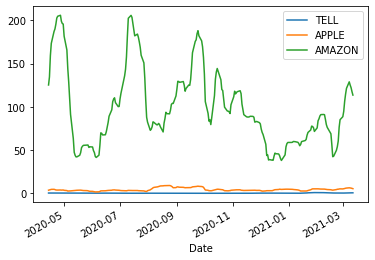

In [68]:
# Calculate rolling standard deviation
# Plot rolling standard deviation
my_stock_df.rolling(window=21).std().plot()

### Calculate and plot the correlation

<AxesSubplot:>

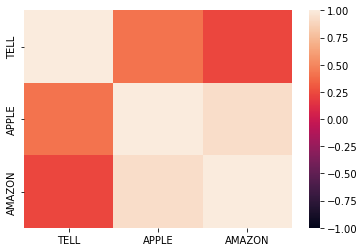

In [69]:
# Calculate and plot the correlation
correlation = my_stock_df.corr()
correlation

sns.heatmap(correlation, vmin=-1, vmax=1)


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

In [76]:
# Calculate and plot Beta
covariance = my_stock_df.rolling(window=60).cov(daily_returns).dropna()
covariance

,TELL,APPLE,AMAZON
Date,,,
2020-06-10,0.007320,0.033014,-0.319949
2020-06-11,0.007606,0.028034,-0.026784
2020-06-12,0.005706,0.023175,-0.027872
2020-06-15,0.006649,0.021919,0.151487
2020-06-16,0.007707,0.007632,0.019664
...,...,...,...
2021-03-08,0.006461,0.040040,0.592968
2021-03-09,0.004784,0.030626,0.464248
2021-03-10,0.004567,0.033666,0.466863


In [77]:
variance = daily_returns.rolling(window=60).var().dropna()
variance

,TELL,APPLE,AMAZON
Date,,,
2020-06-10,0.012209,0.000771,0.000588
2020-06-11,0.013254,0.000795,0.000548
2020-06-12,0.012515,0.000780,0.000550
2020-06-15,0.012233,0.000778,0.000542
2020-06-16,0.011147,0.000701,0.000534
...,...,...,...
2021-03-08,0.006891,0.000450,0.000261
2021-03-09,0.006984,0.000471,0.000277
2021-03-10,0.006983,0.000470,0.000277


<AxesSubplot:xlabel='Date'>

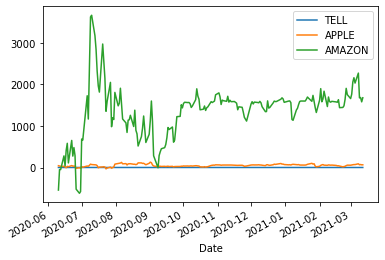

In [78]:
beta = covariance / variance 
beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [80]:
# Annualized Sharpe Rat
# Calculate Annualized Sharpe Ratios
my_sharpe_ratio = (my_stock_df.mean() * 252 / my_stock_df.std() * np.sqrt(252))

<AxesSubplot:title={'center':'Sharpe Ratio'}>

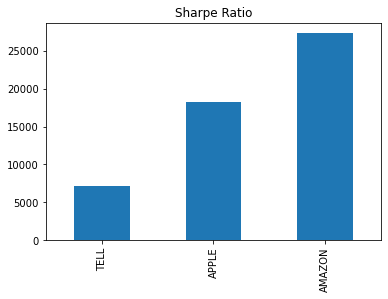

In [81]:
# Visualize the sharpe ratios as a bar plot
my_sharpe_ratio.plot.bar(title="Sharpe Ratio")

### How does your portfolio do?

Write your answer here!

my porfolio didnt compare to the SP500 due to not tradinging those years. i actually used what was in my robinhood portfolio. 